In [122]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, ticker
from matplotlib.colors import LogNorm

In [58]:
MHyd = 1.67 * 10**-27 #kg
RHyd = 5.3 * 10**-11 #m
RCO2 = 116 * 10**-12 #m
G = 6.67 * 10**(-11)
k = 1.38 * 10**(-23)
R = 8.31
rho = 4500 #kg/m3
particles = np.zeros(1000)
marsalt = 150 #km
eners = np.arange(0, 11, 1)
vels = []
for i in eners:
    v = np.sqrt(2 * (i * 1.602 * 10**-19) / MHyd)
    vels.append(v)
#at 150km
ne = 9*10**4 #cm-3 
nHCO = 600
shrat = marsalt/11.1
escaltrange = 5000000 #cm
MarsTex = 400

In [78]:
Tex = []
Mp = []
gs = []
massfact = 1000 ** (1/50)
for i in range(51):
    f = massfact ** i
    mass = (10**23) * f
    rad = (mass / rho) ** (1/3) 
    Mp.append(mass)
    gs.append(mass * G / (rad**2))
for i in range(125):
    x = i * 15
    Tex.append(300 + x)
Ps = 600 #pa, input
Ts = np.arange(200, 510, 10) #K
Pex = Ps * np.e**(-shrat)
print(Tex)

[300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465, 480, 495, 510, 525, 540, 555, 570, 585, 600, 615, 630, 645, 660, 675, 690, 705, 720, 735, 750, 765, 780, 795, 810, 825, 840, 855, 870, 885, 900, 915, 930, 945, 960, 975, 990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140, 1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305, 1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425, 1440, 1455, 1470, 1485, 1500, 1515, 1530, 1545, 1560, 1575, 1590, 1605, 1620, 1635, 1650, 1665, 1680, 1695, 1710, 1725, 1740, 1755, 1770, 1785, 1800, 1815, 1830, 1845, 1860, 1875, 1890, 1905, 1920, 1935, 1950, 1965, 1980, 1995, 2010, 2025, 2040, 2055, 2070, 2085, 2100, 2115, 2130, 2145, 2160]


In [48]:
scale_height = np.array([k * Ts[0] / (44 * MHyd * g * 1000) for g in gs])
print(scale_height)

[44.51151996 42.50817156 40.59498868 38.76791322 37.0230697  35.35675708
 33.76544087 32.2457457  30.79444807 29.4084696  28.08487043 26.82084304
 25.61370626 24.46089958 23.35997774 22.30860555 21.30455291 20.34569008
 19.42998318 18.55548988 17.72035527 16.9228079  16.16115608 15.43378424
 14.73914952 14.07577852 13.44226413 12.83726258 12.25949059 11.70772262
 11.1807883  10.67756994 10.19700013  9.73805952  9.29977464  8.88121584
  8.48149528  8.09976511  7.73521563  7.38707358  7.0546005   6.73709117
  6.43387212  6.14430018  5.86776111  5.60366836  5.35146174  5.11060628
  4.88059111  4.66092833  4.451152  ]


In [49]:
def calc_rate(temp):
    if temp <= 300:
        rat = 2 * (10**-7) * ((temp/300)**-1.25)
    else:
        rat = 2 * (10**-7) * ((temp/300)**-1)
    return rat

def calc_dens(Tex):
    eden = ne * (MarsTex/Tex)
    HCOden = nHCO * (MarsTex/Tex)
    return eden, HCOden

def calc_alt(shrat, sh):
    return shrat * sh

def calc_grav(mass, alt):
    g = -G*mass/((mass/rho)**(1/3)+(alt*1000))**2
    return g

def calc_pres(sh, alt):
    p = Ps * np.e**(-alt/sh)
    return p

600 2.4


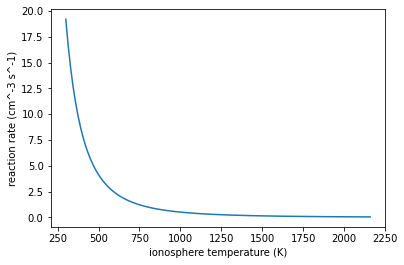

In [190]:
prodrate = []
#print(scale_height)

for j in range(len(Tex)):
    rate = calc_rate(Tex[j])
        #print(rate)
    eden, HCOden = calc_dens(Tex[j])
        #print(rate*eden*HCOden)
    prodrate.append(rate*eden*HCOden)

print(Tex[20], prodrate[20])
#print(Tex)
#[Texar, Mar] = np.meshgrid(Tex, Mp)
prodrate = np.array(prodrate)
#print(Texar)
#plt.contourf(Mar, Texar, prodrate, 200)
plt.plot(Tex, prodrate)
plt.xlabel('ionosphere temperature (K)')
plt.ylabel('reaction rate (cm^-3 s^-1)')
#plt.xscale('log')
#plt.colorbar()
plt.show()
#x: gravity/mass; y:exo temp
        
    

In [98]:
def dens(pressure, temp):
    dens = pressure * .044 / (R * temp)
    return dens
def calc_ve(mass, alt):
    ve = np.sqrt(G*mass*2/((mass/rho)**(1/3)+(alt*1000)))
    return ve
def does_col(mfp, dist):
    p = 1 - np.e**(-dist/mfp)
    if np.random.rand() < p:
        return True
    else:
        return False
print(np.random.rand())

0.6354064844466689


In [241]:
def simulation(pres, vel, sh, mass, temp):
    start_alt = calc_alt(shrat, sh)
    time_step = 10 #s
    #print(start_alt)
    direc = np.random.random_sample(1000)*2*np.pi
    #mfp = 1/(np.pi*((RHyd+RCO2)**2)*dens(pres,temp))
    #print(mfp)
    particles = [{'alt':start_alt, 'angle':direc[i], 'vel':vel, 'trav':0, 'col':False} for i in range(1000)]
    time = np.arange(0, 10000, time_step) #s
    for t in time:
        for p in range(len(particles)):
            #print(mfp)
            if particles[p]['alt'] <= 0:
                particles[p]['alt'] = 0
                continue
            if particles[p]['col']:
                continue
            if particles[p]['alt'] >= 20000:
                continue
            particles[p]['alt'] += particles[p]['vel']*time_step*np.sin(particles[p]['angle'])/1000
            particles[p]['trav'] += particles[p]['vel']*time_step
            vx = np.cos(particles[p]['angle'])*particles[p]['vel']
            vy = np.sin(particles[p]['angle'])*particles[p]['vel']
            vy += time_step*calc_grav(mass, particles[p]['alt'])
            particles[p]['angle'] = np.arctan(vy/vx)
            particles[p]['vel'] = np.sqrt(vy**2 + vx**2)
            try:
                mfp = 1/(np.pi*((RHyd+RCO2)**2)*(dens(calc_pres(sh, particles[p]['alt']),temp)/.044)*6.022*10**23)
                    
            except ZeroDivisionError:
                mfp = 10**8
            if particles[p]['trav'] >= mfp:
                col = does_col(mfp, particles[p]['trav'])
                if col:
                    particles[p]['col'] = True
                particles[p]['trav'] = 0
                    
        #if t % 10000 == 0:
            #print(f'ran {t} seconds')
    esc_part = 0
    for p in particles:
        if p['alt'] >= (5000/11.1)*sh:
            if p['vel'] >= calc_ve(mass, p['alt']):
                esc_part += 1
        elif p['alt'] > 10000:
            esc_part += 1
    return (esc_part/1000), [p['alt'] for p in particles]


0.23


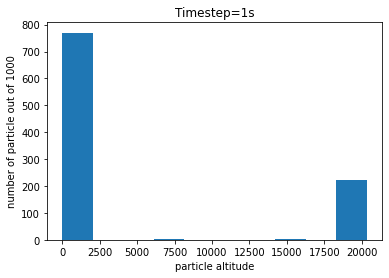

In [245]:

prob, alts = simulation(Pex, vels[7], scale_height[40], Mp[40], Tex[7])
print(prob)
plt.hist(alts)
plt.xlabel('particle altitude')
plt.ylabel('number of particle out of 1000')
plt.title('Timestep=1s')
plt.show()

In [219]:
listprobs = []
for i in range(10):
    sprob, salt = simulation(Pex, vels[7], scale_height[14], Mp[14], Tex[7])
    listprobs.append(sprob)
print(f'prob mean {np.mean(listprobs)}, prob std {np.std(listprobs)}')

prob mean 0.035100000000000006, prob std 0.007687002016391045


In [185]:

probs = []
for i in range(len(vels)):
    lis = []
    for j in range(len(Mp)):
        mas = []
        for t in range(5):
            prob, alts = simulation(Pex, vels[i], scale_height[j], Mp[j], Tex[7])
            mas.append(prob)
        lis.append(np.mean(mas))
        if j % 10 == 0:
            print(f'{j}th mass finished')
    print(f'{i}th vel block finished')
    probs.append(lis)



/var/folders/tr/czy8cmmj6kbdpcdlm79ss_x00000gn/T/ipykernel_55633/2128221059.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  particles[p]['angle'] = np.arctan(vy/vx)


0th mass finished
10th mass finished
20th mass finished
30th mass finished
40th mass finished
50th mass finished
0th vel block finished
0th mass finished
10th mass finished
20th mass finished
30th mass finished
40th mass finished
50th mass finished
1th vel block finished
0th mass finished
10th mass finished
20th mass finished
30th mass finished
40th mass finished
50th mass finished
2th vel block finished
0th mass finished
10th mass finished
20th mass finished
30th mass finished
40th mass finished
50th mass finished
3th vel block finished
0th mass finished
10th mass finished
20th mass finished
30th mass finished
40th mass finished
50th mass finished
4th vel block finished
0th mass finished
10th mass finished
20th mass finished
30th mass finished
40th mass finished
50th mass finished
5th vel block finished
0th mass finished
10th mass finished
20th mass finished
30th mass finished
40th mass finished
50th mass finished
6th vel block finished
0th mass finished
10th mass finished
20th mass f

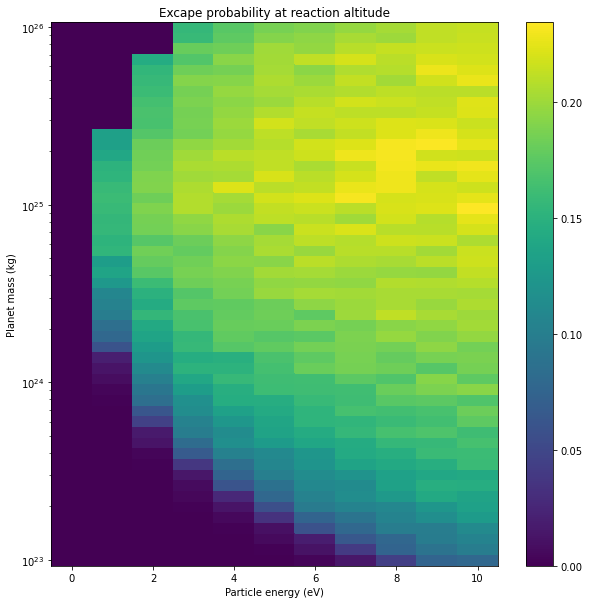

In [186]:
[Mpar, enar] = np.meshgrid(Mp, eners)
probs = np.array(probs)
plt.figure(figsize=(10,10))
plt.pcolor(enar, Mpar, probs)
plt.ylabel('Planet mass (kg)')
plt.xlabel('Particle energy (eV)')
plt.title('Excape probability at reaction altitude')
plt.yscale('log')
#plt.xscale('log')
plt.colorbar()
plt.show()

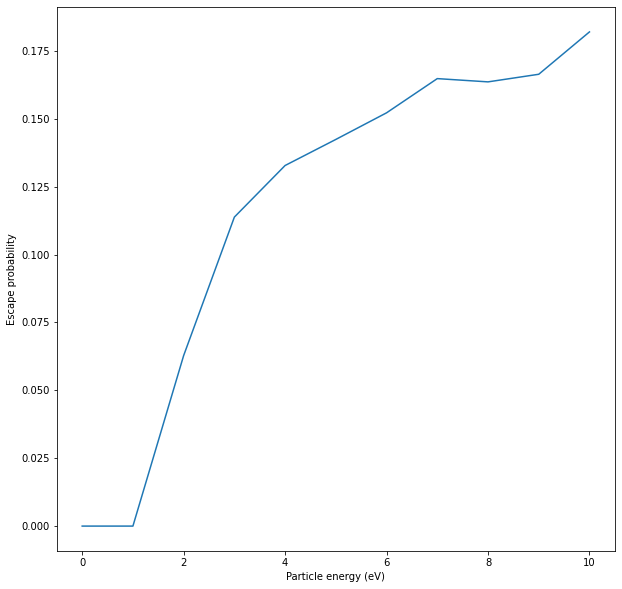

In [196]:
plt.figure(figsize=(10,10))
plt.plot(eners, [probs[i][14] for i in range(len(probs))])
plt.xlabel('Particle energy (eV)')
plt.ylabel('Escape probability')
plt.show()

In [187]:
fluxes = []
for i in range(len(probs)):
    massbloc = []
    for j in range(len(probs[i])):
        tempbloc = []
        for k in range(len(prodrate)):
            flux = probs[i][j] * prodrate[k] * escaltrange
            tempbloc.append(flux)
        massbloc.append(tempbloc)
    fluxes.append(massbloc)

5765597.667638483


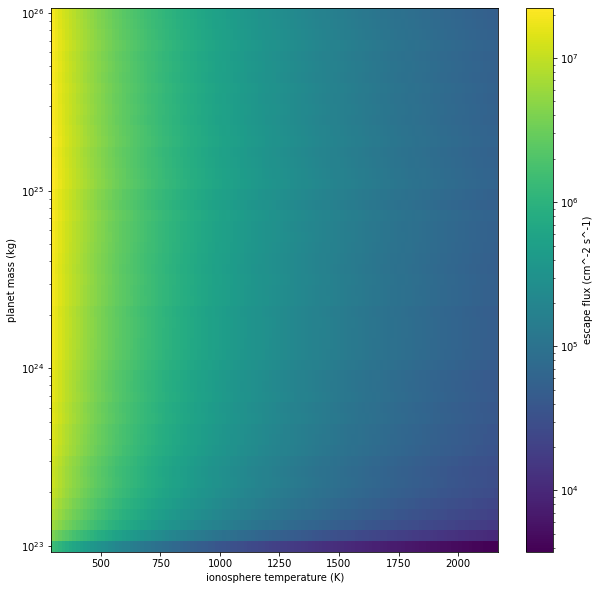

In [228]:
[Texar, Mpar] = np.meshgrid(Tex, Mp)
print(fluxes[7][14][8])
plt.figure(figsize=(10,10))
plt.xlabel('ionosphere temperature (K)')
plt.ylabel('planet mass (kg)')
plt.yscale('log')
#plt.xscale('log')
plt.pcolor(Texar, Mpar, fluxes[7], norm=LogNorm())
#plt.xlim(300, 2000)
plt.colorbar(label='escape flux (cm^-2 s^-1)')
plt.show()